## Caracterização meteorológica da área de estudo

Autor: Mayara Dargas Sousa

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

Meteorologia de superfície
Meteorologia upperair ou sondagem/perfil da atmosfera
Superfície - Albedo, razão de Bowen e Rugosidade

## Obtenção de dados 

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados foram coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR e referem-se ao período de 01/01/2023 a 01/01/2024 no munícipio de Florinaópolis.
Foi optada por esta estação pois é a mais próxima do munícipio de interesse, Criciúma, onde esta localizada a fábrica da Eliane Revetsimento. Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

### Parte 01

1 - Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

## Meteorologia de superfície

In [51]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSuperficie
['metar_2023.csv']


In [52]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [53]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


## Série temporal sem outliers 

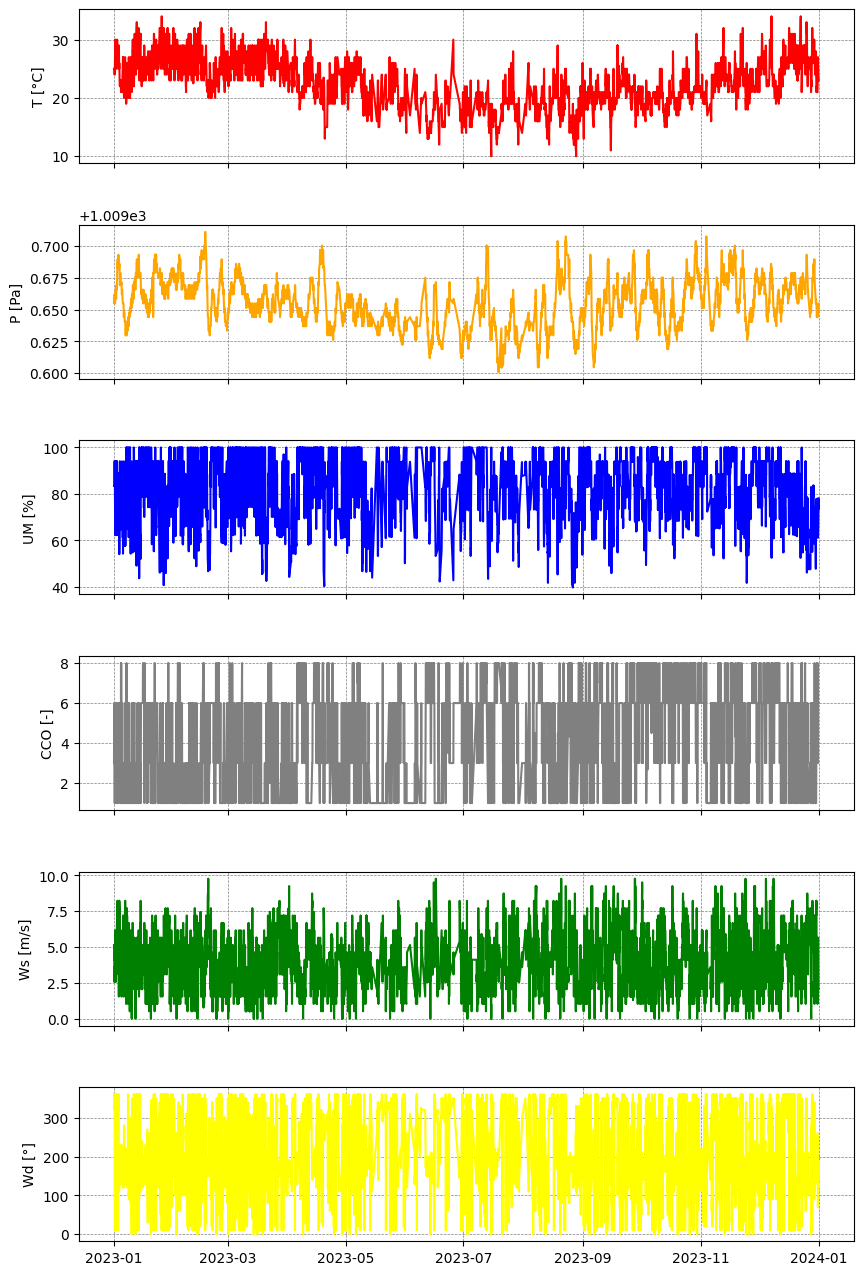

In [54]:
import matplotlib.pyplot as plt

# Função para remover outliers usando o método do desvio padrão
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    return df_filtered

# Removendo outliers de cada coluna relevante
columns_to_check = ['temp', 'p', 'relh', 'cco', 'ws', 'wd']
for col in columns_to_check:
    metSuperficie = remove_outliers(metSuperficie, col)

# Plotando os gráficos
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 16))

# Adicionar grade de coordenadas fina e cinza
for a in ax:
    a.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red')
ax[0].set_ylabel('T [°C]')

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange')
ax[1].set_ylabel('P [Pa]')

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='blue')
ax[2].set_ylabel('UM [%]')

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray')
ax[3].set_ylabel('CCO [-]')

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='green')
ax[4].set_ylabel('Ws [m/s]')

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='yellow')
ax[5].set_ylabel('Wd [°]')

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4)

plt.show()


## Fazendo boxplot das variáveis

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da Um é:100.0
O percentil 99 da cco é:8.0
O percentil 99 da Ws é:8.231104
O percentil 99 da Wd é:360.0


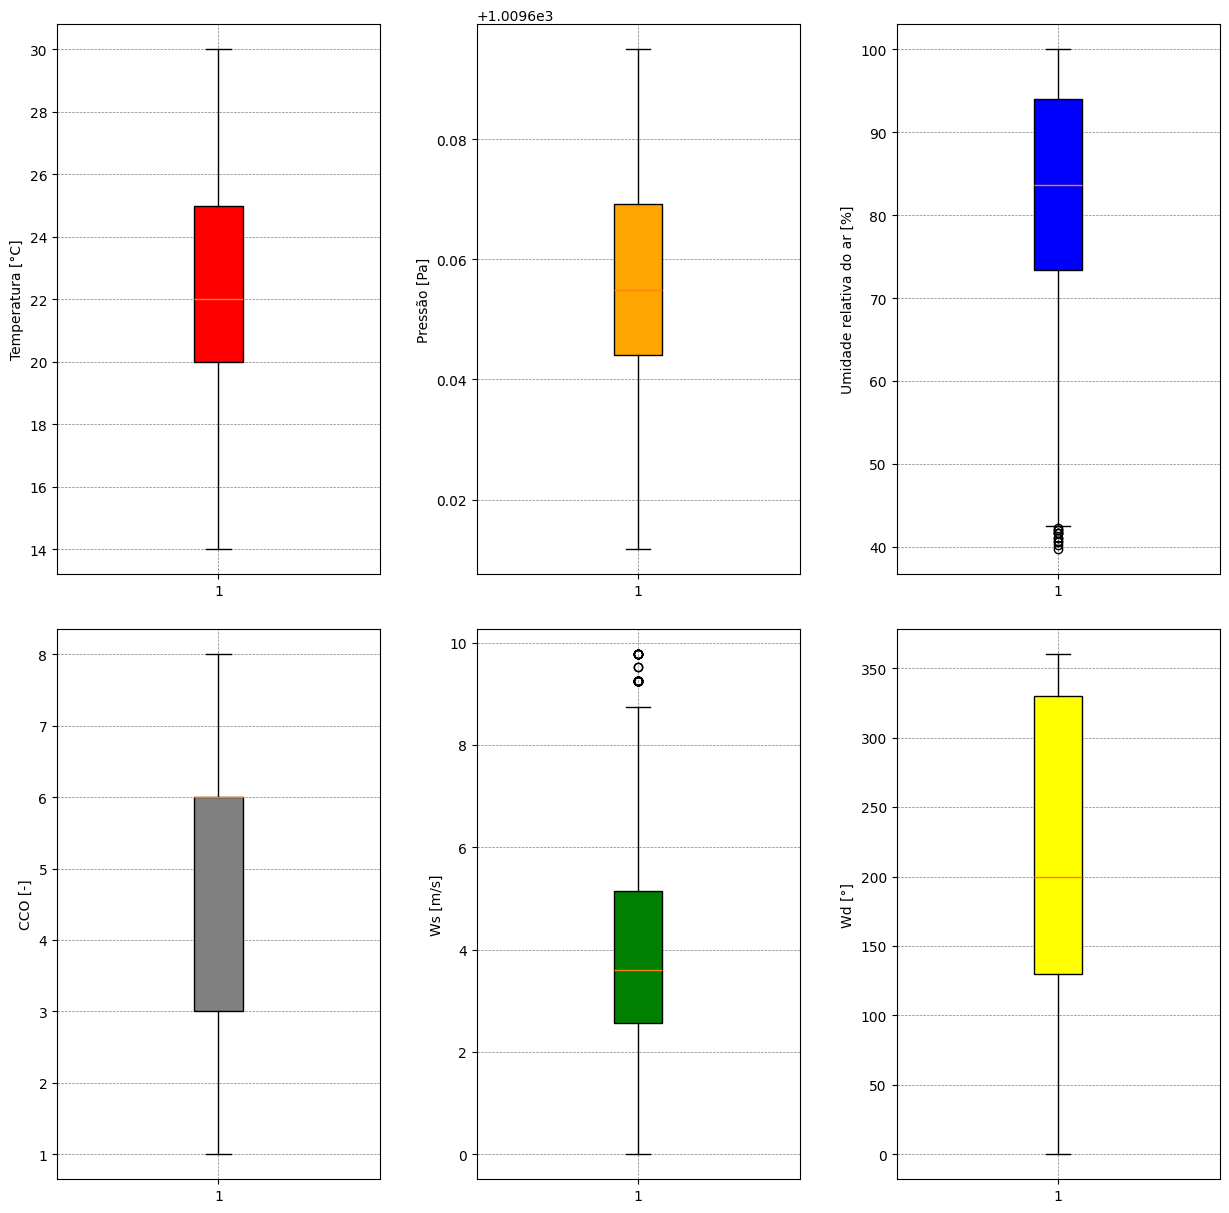

In [55]:
# Calculando os percentis 99 para as variáveis
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é:' + str(p99))
Um99 = np.percentile(metSuperficie['relh'], 99)
print('O percentil 99 da Um é:' + str(Um99))
cco99 = np.nanpercentile(metSuperficie['cco'], 99)
print('O percentil 99 da cco é:' + str(cco99))
Ws99 = np.nanpercentile(metSuperficie['ws'], 99)
print('O percentil 99 da Ws é:' + str(Ws99))
Wd99 = np.nanpercentile(metSuperficie['wd'], 99)
print('O percentil 99 da Wd é:' + str(Wd99))

# Criando a figura com 6 subgráficos em uma grade 2x3
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

# Boxplot da temperatura
bp_temp = ax[0, 0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) &
                                                 (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))],
                           patch_artist=True)
for patch in bp_temp['boxes']:
    patch.set_facecolor('red')
    ax[0, 0].set_ylabel('Temperatura [°C]')
ax[0, 0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da pressão
bp_p = ax[0, 1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) &
                                           (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))],
                        patch_artist=True)
for patch in bp_p['boxes']:
    patch.set_facecolor('orange')
ax[0, 1].set_ylabel('Pressão [Pa]')
ax[0, 1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da umidade relativa do ar
bp_relh = ax[0, 2].boxplot(metSuperficie['relh'], patch_artist=True)
for patch in bp_relh['boxes']:
    patch.set_facecolor('blue')
ax[0, 2].set_ylabel('Umidade relativa do ar [%]')
ax[0, 2].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da CCO
bp_cco = ax[1, 0].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])], patch_artist=True)
for patch in bp_cco['boxes']:
    patch.set_facecolor('gray')
ax[1, 0].set_ylabel('CCO [-]')
ax[1, 0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da Ws
bp_ws = ax[1, 1].boxplot(metSuperficie['ws'][~np.isnan(metSuperficie['ws'])], patch_artist=True)
for patch in bp_ws['boxes']:
    patch.set_facecolor('green')
ax[1, 1].set_ylabel('Ws [m/s]')
ax[1, 1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da Wd
bp_wd = ax[1, 2].boxplot(metSuperficie['wd'][~np.isnan(metSuperficie['wd'])], patch_artist=True)
for patch in bp_wd['boxes']:
    patch.set_facecolor('yellow')
ax[1, 2].set_ylabel('Wd [°]')
ax[1, 2].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.1, wspace=0.3)

# Exibindo a figura
plt.show()


In [56]:
# Estatísticas dos dados
#print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

#print(media_mensal, min_mensal, max_mensal)

# Mostrar as estatísticas calculadas
#display(media_mensal, min_mensal, max_mensal)

# Títulos dos DataFrames
titulos = ["Média Mensal", "Mínimo Mensal", "Máximo Mensal"]

# DataFrames e seus respectivos títulos
dataframes = [media_mensal, min_mensal, max_mensal]
dataframes_com_titulos = dict(zip(titulos, dataframes))

# Mostrar as estatísticas calculadas com títulos
for titulo, dataframe in dataframes_com_titulos.items():
    print(f"\n{titulo}\n")
    display(dataframe)


Média Mensal



C:\Users\mayar\AppData\Local\Temp\ipykernel_11512\3893957294.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\mayar\AppData\Local\Temp\ipykernel_11512\3893957294.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\mayar\AppData\Local\Temp\ipykernel_11512\3893957294.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
datetime,,,,,,,,,,,,,,,,
2023-01-31,15.453834,1.0,2023.0,11.655712,NaN,195.026082,3.941119,1359.905665,3.893845,3.675013,1009.665297,25.748305,21.935055,NaN,0.0,80.740347
2023-02-28,14.179337,2.0,2023.0,11.888889,NaN,201.907083,3.575703,1457.068772,3.880117,3.598441,1009.667048,25.322612,22.153671,NaN,0.0,83.955101
2023-03-31,15.313356,3.0,2023.0,11.905822,NaN,206.569635,3.476314,1475.539932,3.849030,3.581050,1009.659625,25.901541,22.988870,NaN,0.0,85.152389
2023-04-30,15.377734,4.0,2023.0,12.027833,NaN,225.526839,3.413263,1345.967714,5.126905,4.838966,1009.653580,22.175944,19.337972,NaN,0.0,85.403221
2023-05-31,15.783599,5.0,2023.0,11.478360,NaN,245.284738,3.575913,1369.204647,4.199317,4.060364,1009.644844,21.739180,18.857631,NaN,0.0,85.081185
2023-06-30,17.169065,6.0,2023.0,11.863309,NaN,226.043165,4.362288,1391.718993,5.640288,5.285971,1009.635581,17.555755,14.444245,NaN,0.0,83.204011
2023-07-31,15.743590,7.0,2023.0,11.437870,NaN,230.586456,3.669430,1173.309665,5.283037,5.169297,1009.637553,18.162393,15.192965,NaN,0.0,83.969191
2023-08-31,16.974895,8.0,2023.0,11.012552,NaN,225.105300,4.365097,1311.320167,4.813459,4.527266,1009.646697,18.381102,14.644003,NaN,0.0,80.074059
2023-09-30,15.854578,9.0,2023.0,11.432675,NaN,215.792938,4.184283,1186.795619,5.030221,4.846349,1009.654581,20.529025,17.590515,NaN,0.0,84.122928



Mínimo Mensal



,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
datetime,,,,,,,,,,,,,,,,
2023-01-31,1,1,2023,0,NaN,0.0,0.0,274.32,1.0,1.0,1009.629680,19.0,10.0,NaN,0.0,40.69
2023-02-28,1,2,2023,0,NaN,0.0,0.0,121.92,1.0,1.0,1009.629680,20.0,11.0,NaN,0.0,46.71
2023-03-31,1,3,2023,0,NaN,0.0,0.0,182.88,1.0,1.0,1009.640461,22.0,15.0,NaN,0.0,42.52
2023-04-30,1,4,2023,0,NaN,0.0,0.0,243.84,1.0,1.0,1009.626086,13.0,7.0,NaN,0.0,40.29
2023-05-31,1,5,2023,0,NaN,0.0,0.0,243.84,1.0,1.0,1009.622493,15.0,10.0,NaN,0.0,43.97
2023-06-30,1,6,2023,0,NaN,0.0,0.0,121.92,1.0,1.0,1009.611713,12.0,5.0,NaN,0.0,42.28
2023-07-31,1,7,2023,0,NaN,0.0,0.0,91.44,1.0,1.0,1009.600932,10.0,6.0,NaN,0.0,43.42
2023-08-31,2,8,2023,0,NaN,0.0,0.0,60.96,1.0,1.0,1009.604526,10.0,1.0,NaN,0.0,39.72
2023-09-30,1,9,2023,0,NaN,0.0,0.0,60.96,1.0,1.0,1009.604526,11.0,8.0,NaN,0.0,45.88



Máximo Mensal



,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
datetime,,,,,,,,,,,,,,,,
2023-01-31,31,1,2023,23,NaN,360.0,8.231104,3048.0,8.0,8.0,1009.693167,34.0,26.0,NaN,0.0,100.0
2023-02-28,28,2,2023,23,NaN,360.0,9.774436,3048.0,8.0,8.0,1009.711136,33.0,26.0,NaN,0.0,100.0
2023-03-31,31,3,2023,23,NaN,360.0,8.231104,3048.0,8.0,8.0,1009.685980,33.0,27.0,NaN,0.0,100.0
2023-04-30,30,4,2023,23,NaN,360.0,9.259992,3048.0,8.0,8.0,1009.700354,30.0,24.0,NaN,0.0,100.0
2023-05-31,31,5,2023,23,NaN,360.0,8.231104,3048.0,8.0,8.0,1009.662022,28.0,24.0,NaN,0.0,100.0
2023-06-30,30,6,2023,23,NaN,360.0,9.774436,3048.0,8.0,8.0,1009.675199,30.0,21.0,NaN,0.0,100.0
2023-07-31,31,7,2023,23,NaN,360.0,8.745548,3048.0,8.0,8.0,1009.700354,28.0,21.0,NaN,0.0,100.0
2023-08-31,31,8,2023,23,NaN,360.0,9.774436,3048.0,8.0,8.0,1009.707542,29.0,21.0,NaN,0.0,100.0
2023-09-30,30,9,2023,23,NaN,360.0,9.774436,3048.0,8.0,8.0,1009.696761,29.0,22.0,NaN,0.0,100.0


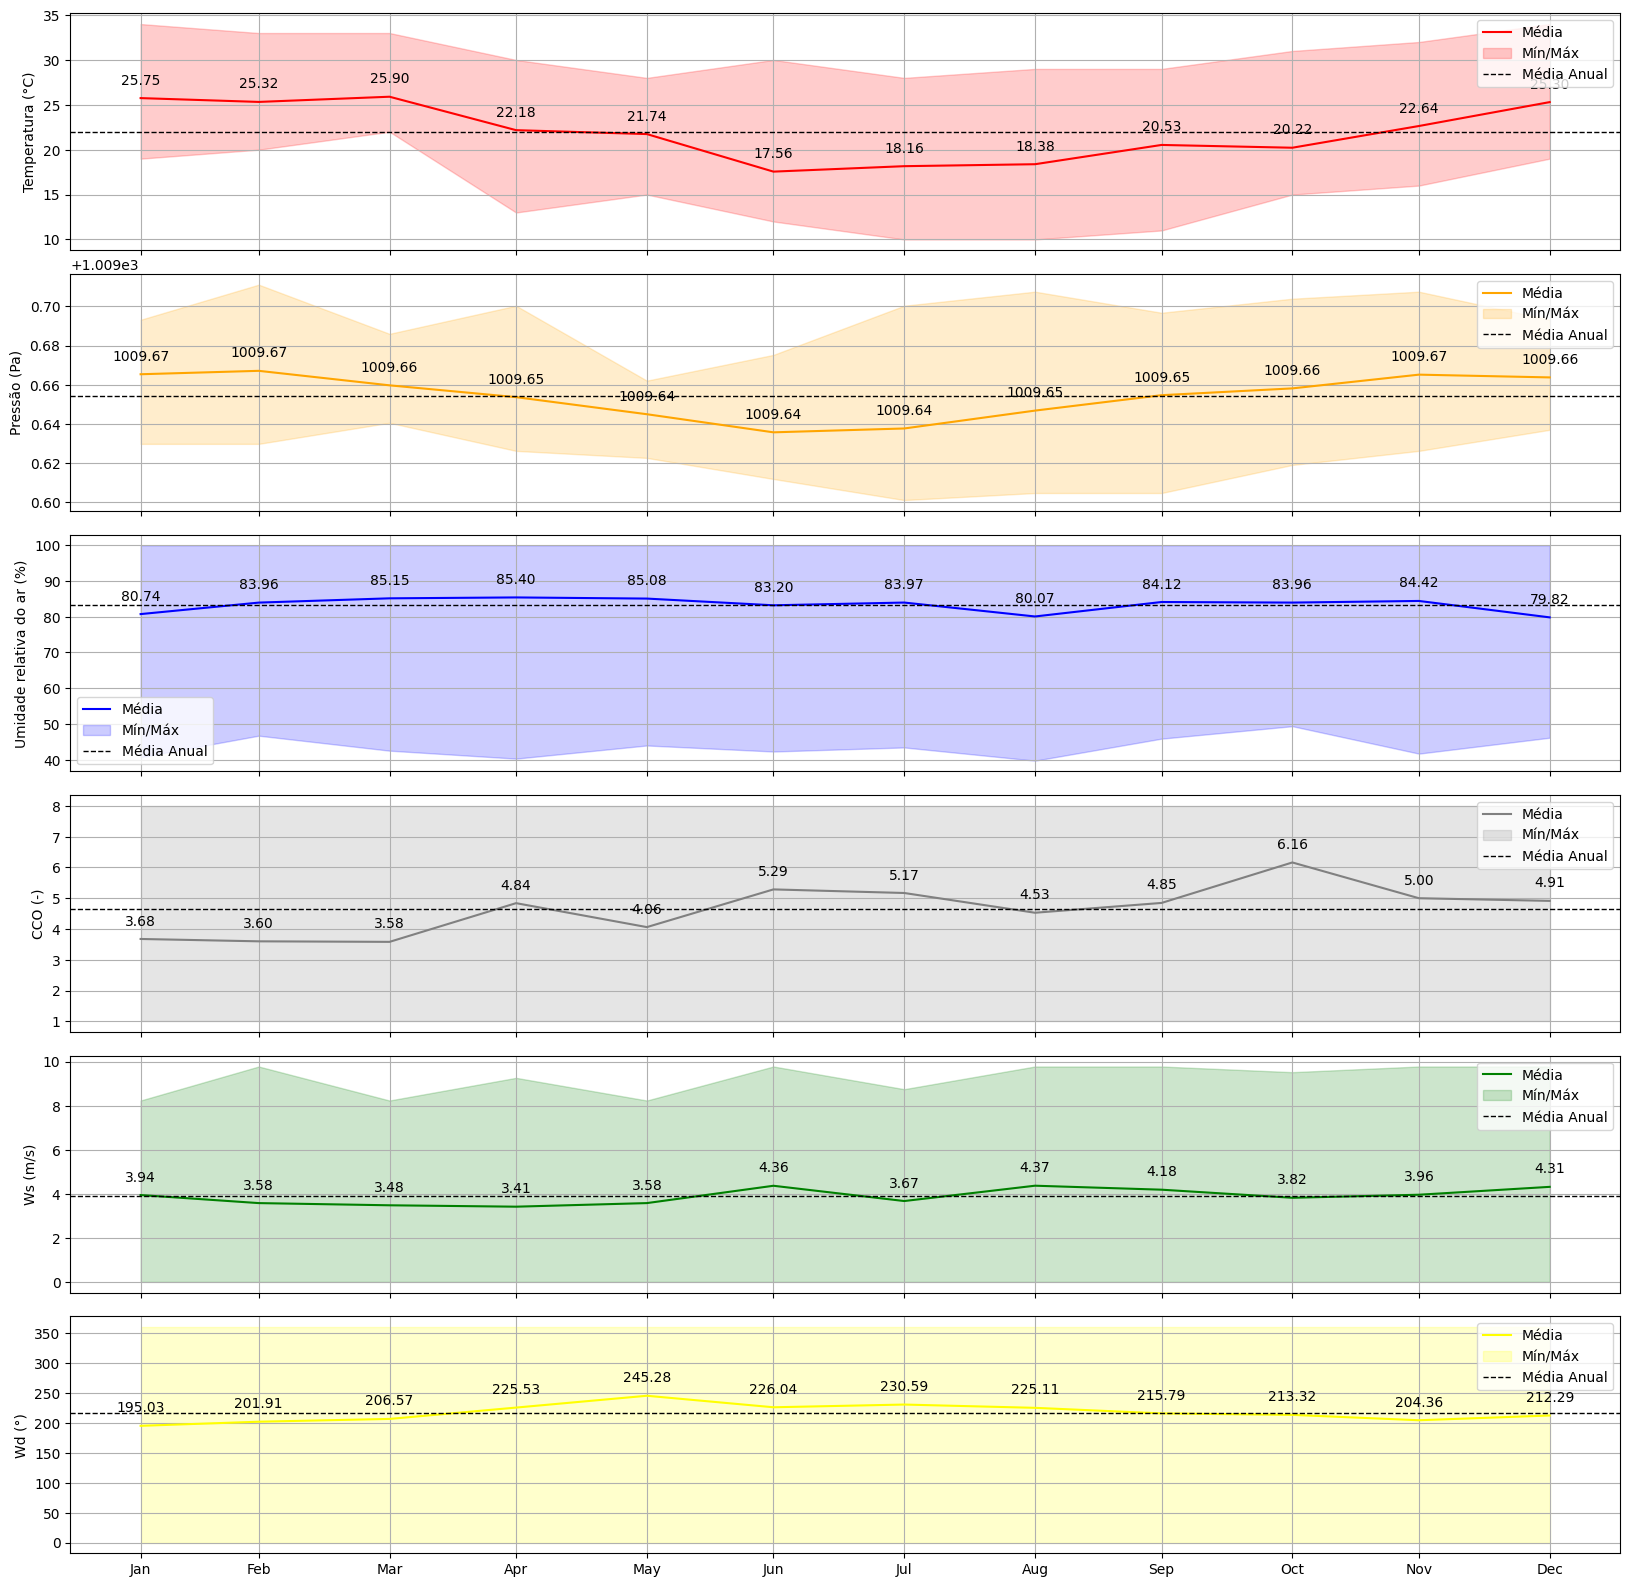

In [57]:
import matplotlib.pyplot as plt
import calendar

# Função para adicionar uma linha média tracejada
def add_mean_line(axis, mean_value, color='black'):
    axis.axhline(y=mean_value, color=color, linestyle='--', linewidth=1, label='Média Anual')

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(20, 20))

# Definindo os ticks e rótulos do eixo x
ax[-1].set_xticks(media_mensal.index)
ax[-1].set_xticklabels([calendar.month_abbr[i.month] for i in media_mensal.index])

# Gráfico 1: Temperatura em °C (vermelho)
temp_media = media_mensal['temp'].mean()
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Mín/Máx')
ax[0].set_ylabel('Temperatura (°C)')
add_mean_line(ax[0], temp_media, color='black')
ax[0].grid(True)
ax[0].legend()

# Adicionar rótulos de valor em cada ponto
for i, temp in enumerate(media_mensal['temp']):
    ax[0].annotate(f'{temp:.2f}', (media_mensal.index[i], temp), textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 2: Pressão em Pascal (laranja)
p_media = media_mensal['p'].mean()
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Mín/Máx')
ax[1].set_ylabel('Pressão (Pa)')
add_mean_line(ax[1], p_media, color='black')
ax[1].grid(True)
ax[1].legend()

# Adicionar rótulos de valor em cada ponto
for i, p in enumerate(media_mensal['p']):
    ax[1].annotate(f'{p:.2f}', (media_mensal.index[i], p), textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 3: Umidade relativa do ar em % (azul)
relh_media = media_mensal['relh'].mean()
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2, label='Mín/Máx')
ax[2].set_ylabel('Umidade relativa do ar (%)')
add_mean_line(ax[2], relh_media, color='black')
ax[2].grid(True)
ax[2].legend()

# Adicionar rótulos de valor em cada ponto
for i, relh in enumerate(media_mensal['relh']):
    ax[2].annotate(f'{relh:.2f}', (media_mensal.index[i], relh), textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 4: CCO (-) (cinza)
cco_media = media_mensal['cco'].mean()
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Mín/Máx')
ax[3].set_ylabel('CCO (-)')
add_mean_line(ax[3], cco_media, color='black')
ax[3].grid(True)
ax[3].legend()

# Adicionar rótulos de valor em cada ponto
for i, cco in enumerate(media_mensal['cco']):
    ax[3].annotate(f'{cco:.2f}', (media_mensal.index[i], cco), textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 5: Ws (m/s) (verde)
ws_media = media_mensal['ws'].mean()
ax[4].plot(media_mensal.index, media_mensal['ws'], color='green', label='Média')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='green', alpha=0.2, label='Mín/Máx')
ax[4].set_ylabel('Ws (m/s)')
add_mean_line(ax[4], ws_media, color='black')
ax[4].grid(True)
ax[4].legend()

# Adicionar rótulos de valor em cada ponto
for i, ws in enumerate(media_mensal['ws']):
    ax[4].annotate(f'{ws:.2f}', (media_mensal.index[i], ws), textcoords="offset points", xytext=(0,10), ha='center')

# Gráfico 6: Wd (°) (amarelo)
wd_media = media_mensal['wd'].mean()
ax[5].plot(media_mensal.index, media_mensal['wd'], color='yellow', label='Média')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='yellow', alpha=0.2, label='Mín/Máx')
ax[5].set_ylabel('Wd (°)')
add_mean_line(ax[5], wd_media, color='black')
ax[5].grid(True)
ax[5].legend()

# Adicionar rótulos de valor em cada ponto
for i, wd in enumerate(media_mensal['wd']):
    ax[5].annotate(f'{wd:.2f}', (media_mensal.index[i], wd), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustando o espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.1)

plt.show()


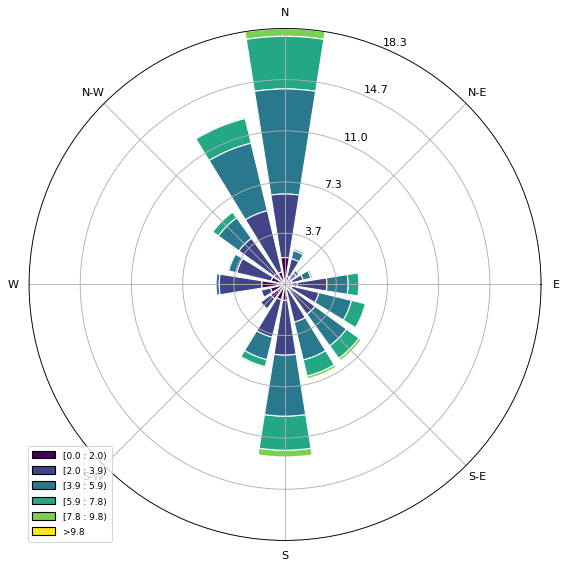

In [58]:
# Criando minha rosa dos ventos para avaliar a direção do vento #trocar a ordem antes de enviar
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Discussão dos relfexos das condições metereológicas na qualidade do ar

## Parte 02

2 - Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

meia noite e 12h em 10 dias, 5 de inverno e 5 de verão, ou seja: 20 gráficos 

# Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [76]:
import random
from datetime import datetime, timedelta
!pip install siphon

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para gerar datas aleatórias em um intervalo de dias
def random_dates(start_date, end_date, n):
    delta = end_date - start_date
    return [start_date + timedelta(days=random.randint(0, delta.days)) for _ in range(n)]

# Definindo intervalos para verão e inverno
# Verão no Hemisfério Sul (21 de dezembro a 20 de março)
summer_start = datetime(2023, 12, 21)
summer_end = datetime(2024, 3, 20)

# Inverno no Hemisfério Sul (21 de junho a 20 de setembro)
winter_start = datetime(2023, 6, 21)
winter_end = datetime(2023, 9, 20)

# Gerando 5 datas aleatórias para verão e inverno
summer_dates = random_dates(summer_start, summer_end, 5)
winter_dates = random_dates(winter_start, winter_end, 5)

# Estação de análise
station = 'SBFL'

# Função para extrair dados para uma lista de datas
def extract_data(dates, times, station):
    data = {}
    for date in dates:
        for time in times:
            datetime_obj = datetime(date.year, date.month, date.day, time)
            try:
                df = WyomingUpperAir.request_data(datetime_obj, station)
                data[datetime_obj] = df
            except Exception as e:
                print(f"Falha ao obter dados para {datetime_obj}: {e}")
    return data

# Horários de interesse (00h e 12h)
times = [0, 12]

# Extraindo dados
summer_data = extract_data(summer_dates, times, station)
winter_data = extract_data(winter_dates, times, station)

# Imprimindo os dados extraídos
for datetime_obj, df in summer_data.items():
    print(f"Dados para {datetime_obj} (Verão):")
    print(df)
    print("\n")

for datetime_obj, df in winter_data.items():
    print(f"Dados para {datetime_obj} (Inverno):")
    print(df)
    print("\n")


Falha ao obter dados para 2023-12-21 00:00:00: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=12&FROM=2100&TO=2100&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)
Falha ao obter dados para 2023-12-21 12:00:00: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=12&FROM=2112&TO=2112&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)
Falha ao obter dados para 2024-03-05 00:00:00: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2024&MONTH=03&FROM=0500&TO=0500&STNM=SBFL
Server Error (503: Sorry, the server is too busy to process your request.
Please try again later.
)
Dados para 2024-02-19 00:00:00 (Verão):
     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1010.0      5.0         24

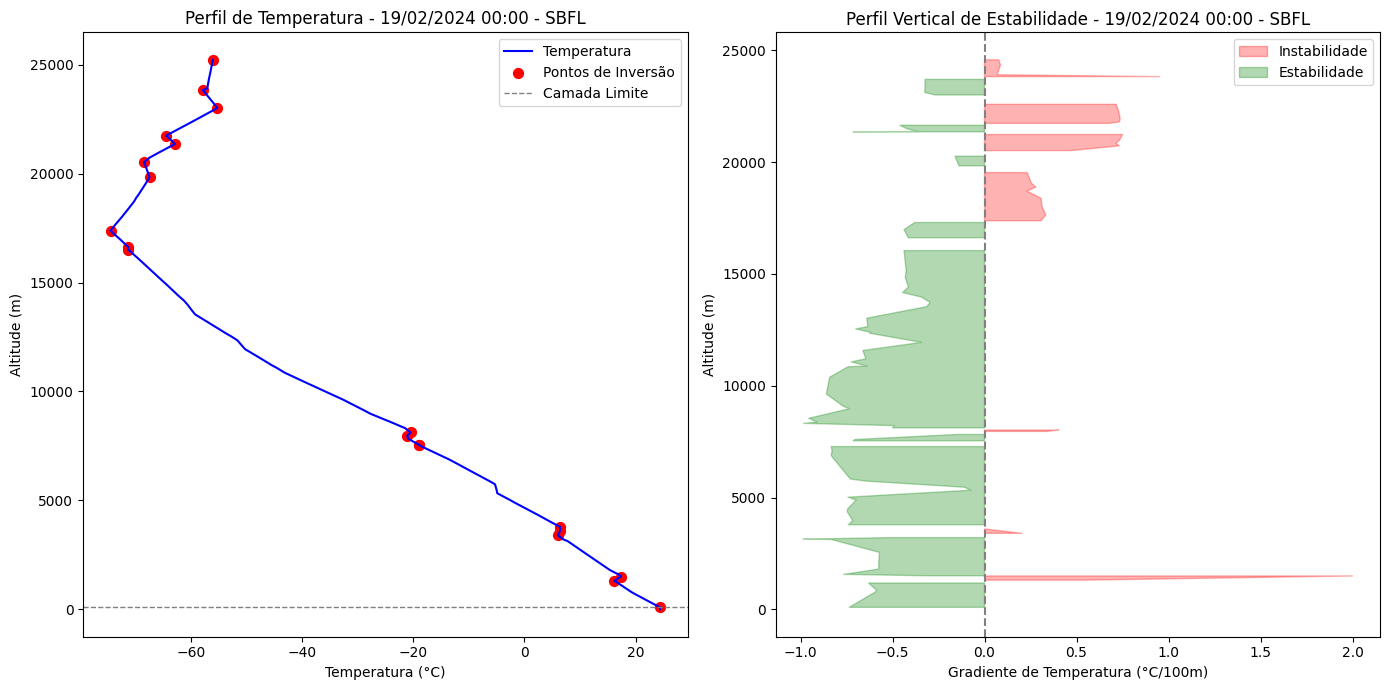

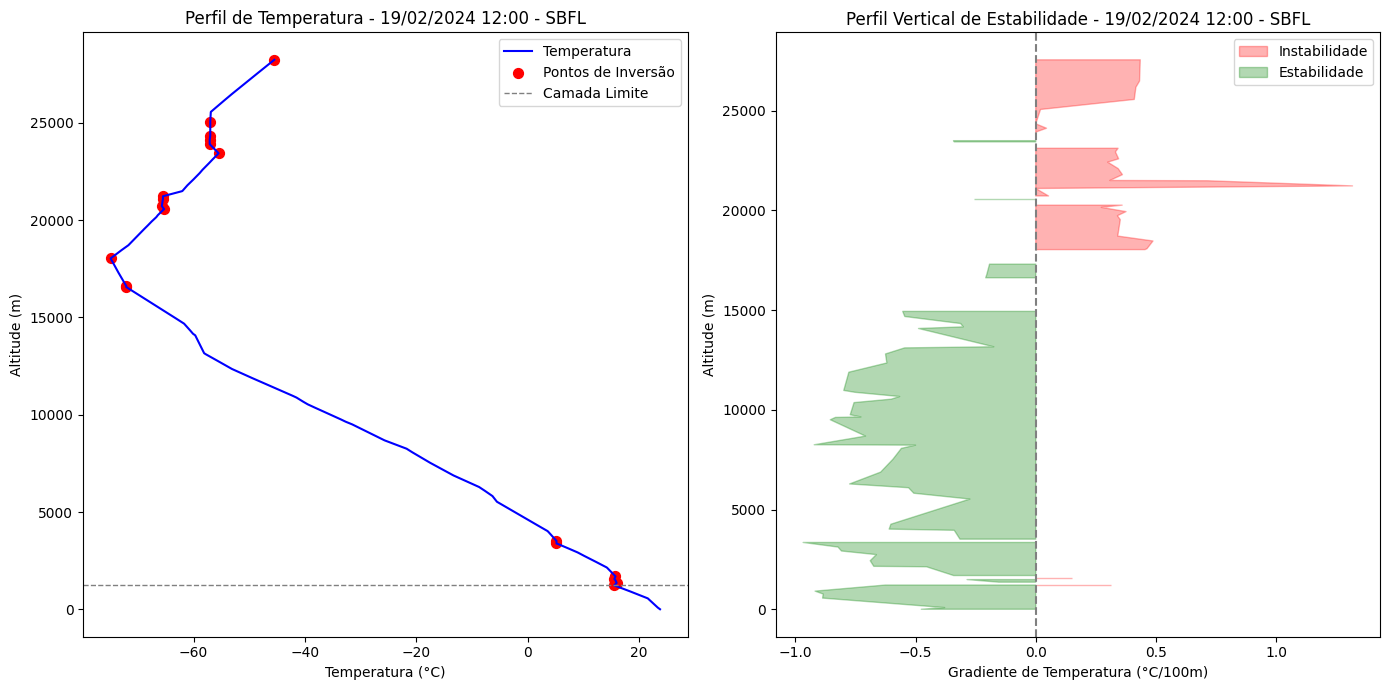

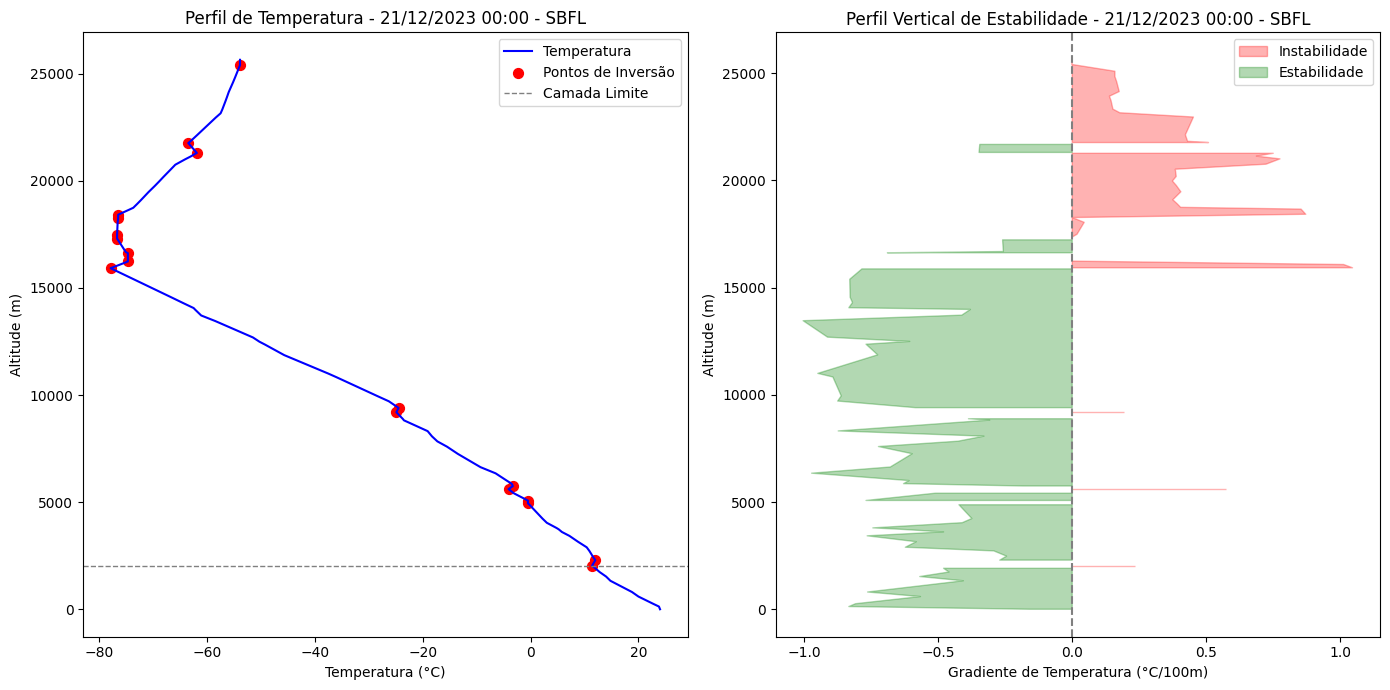

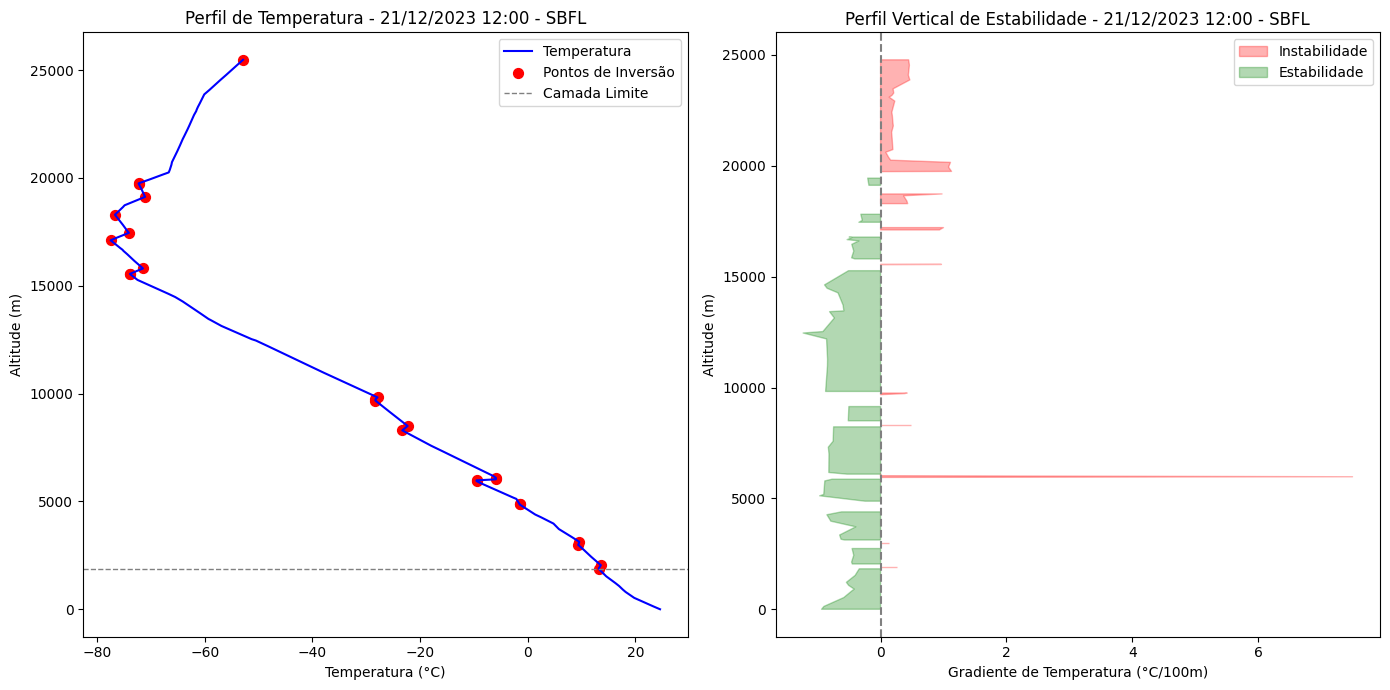

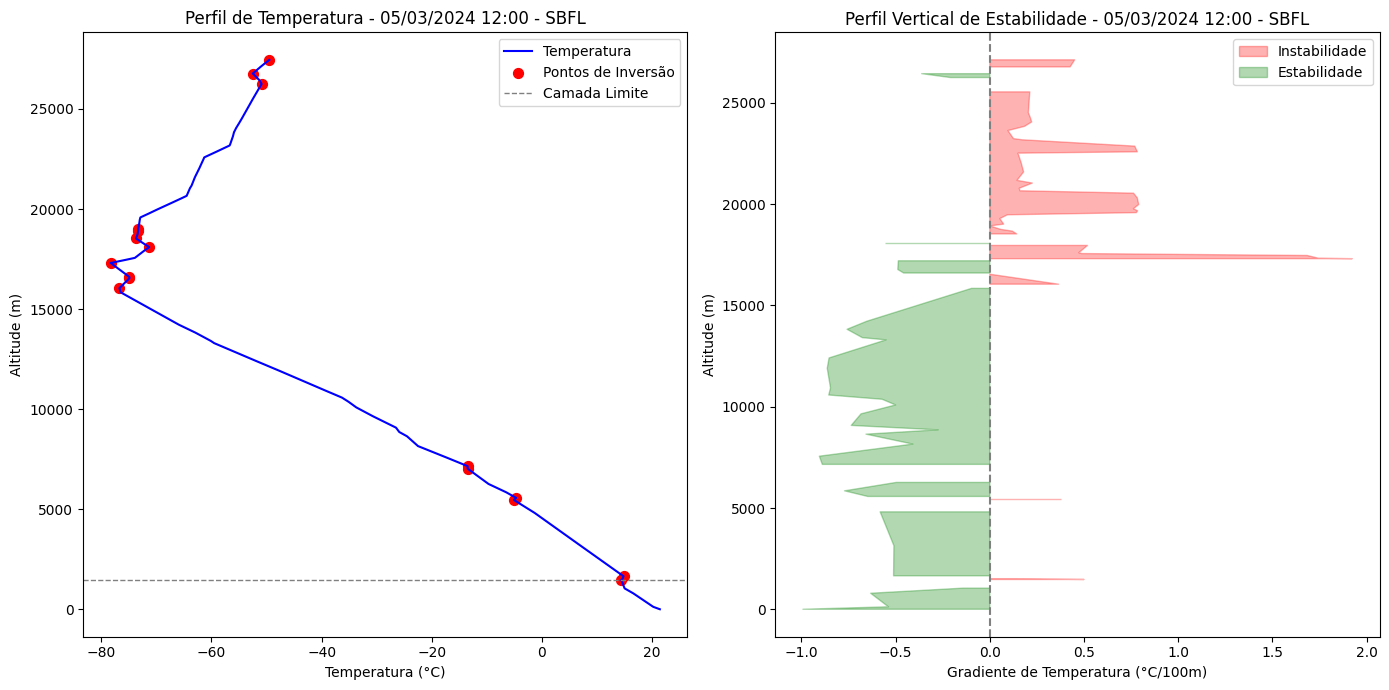

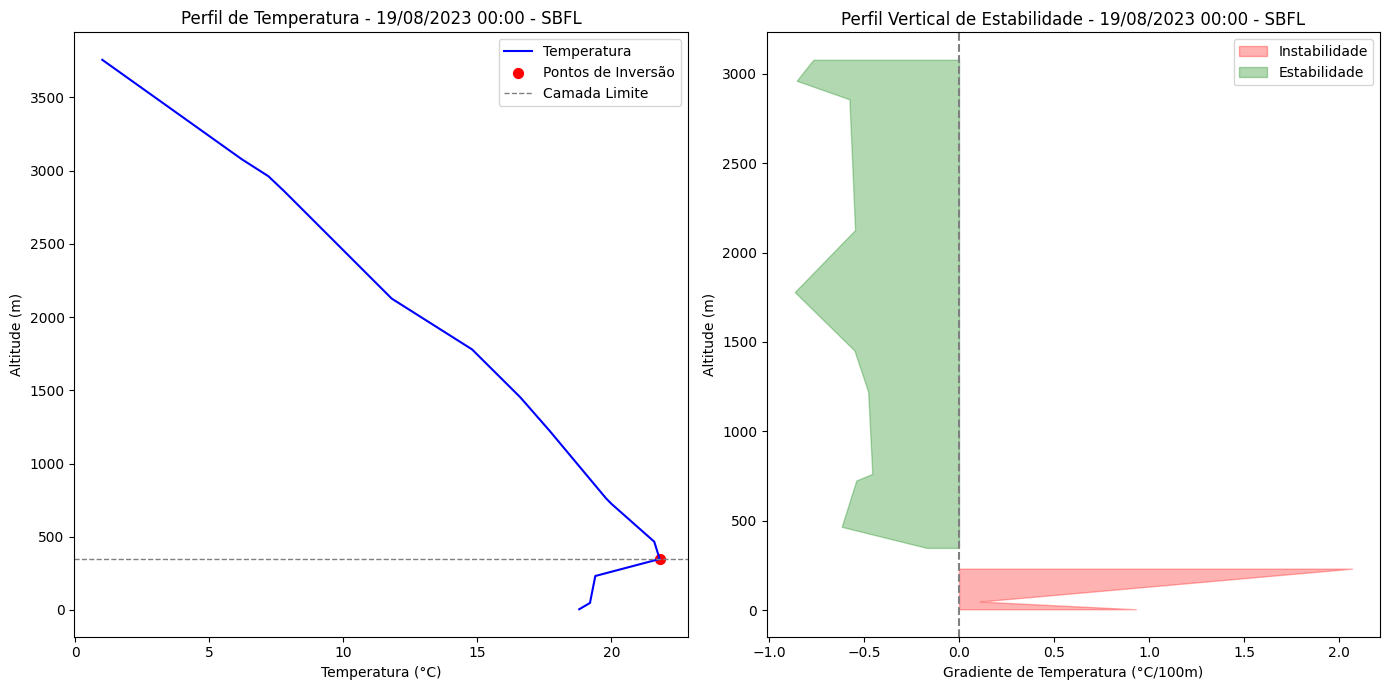

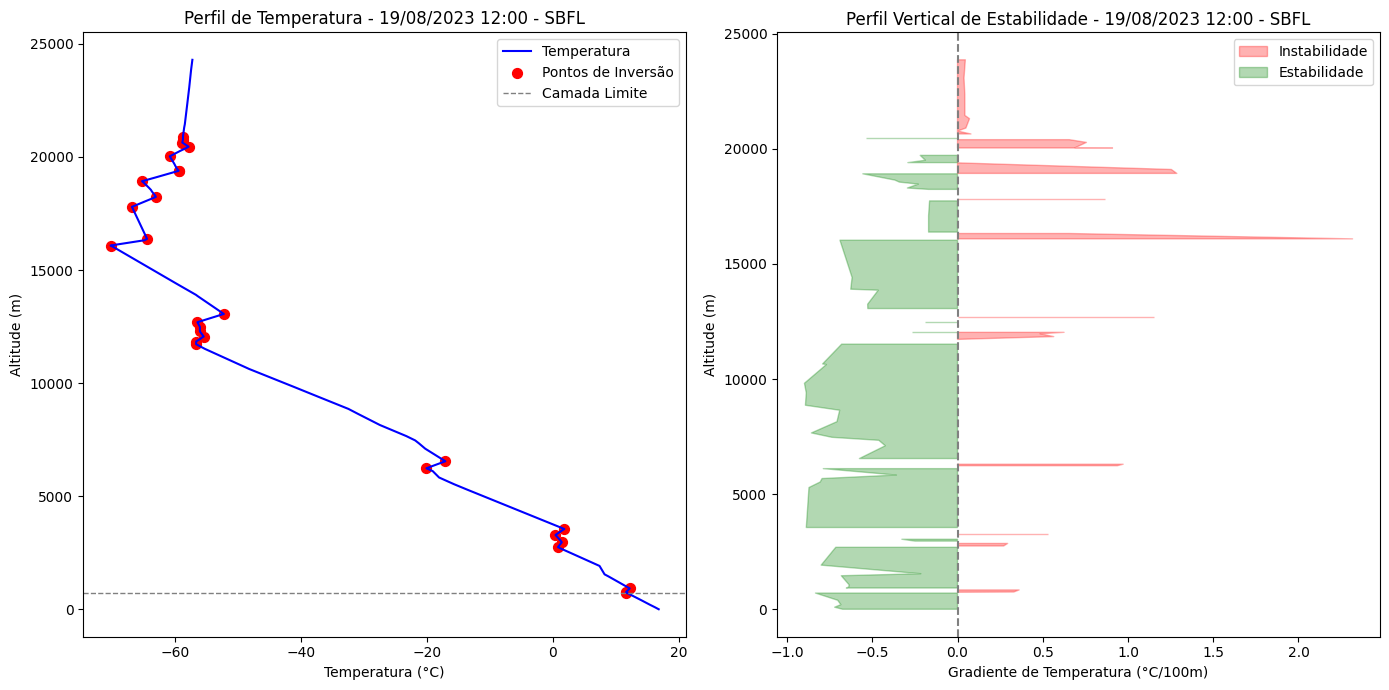

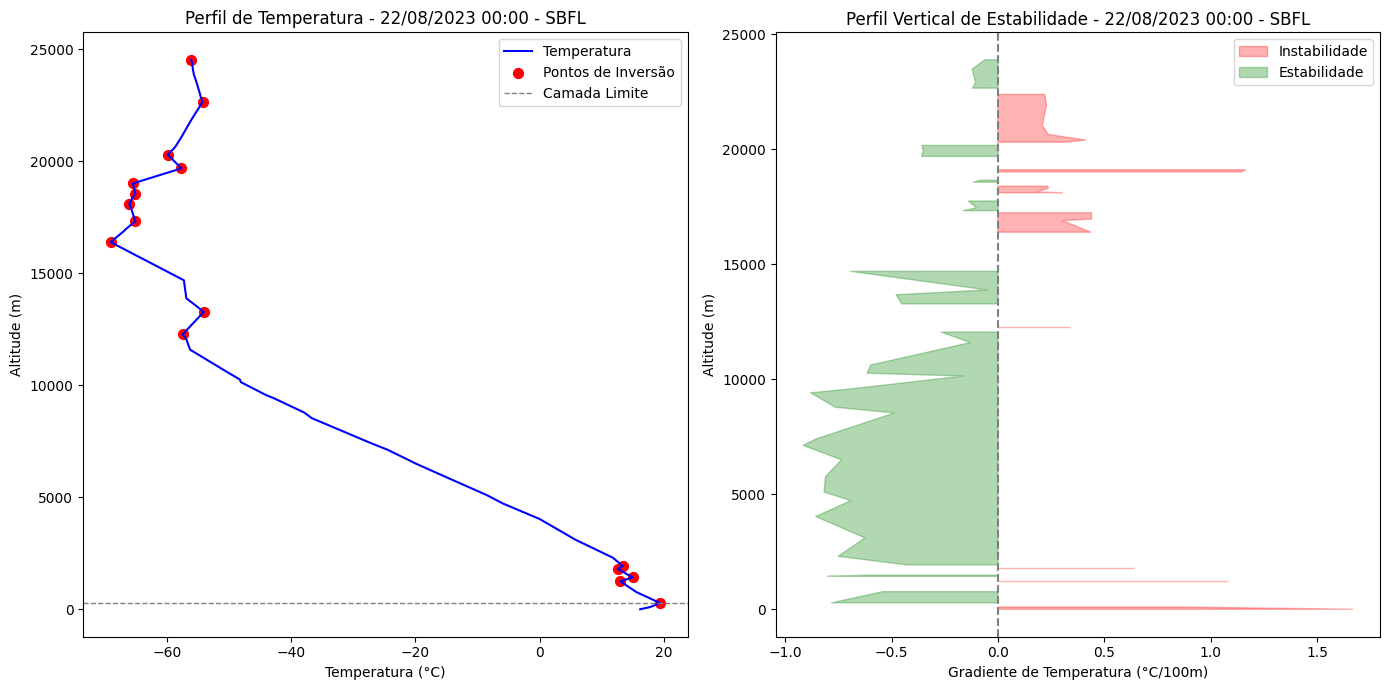

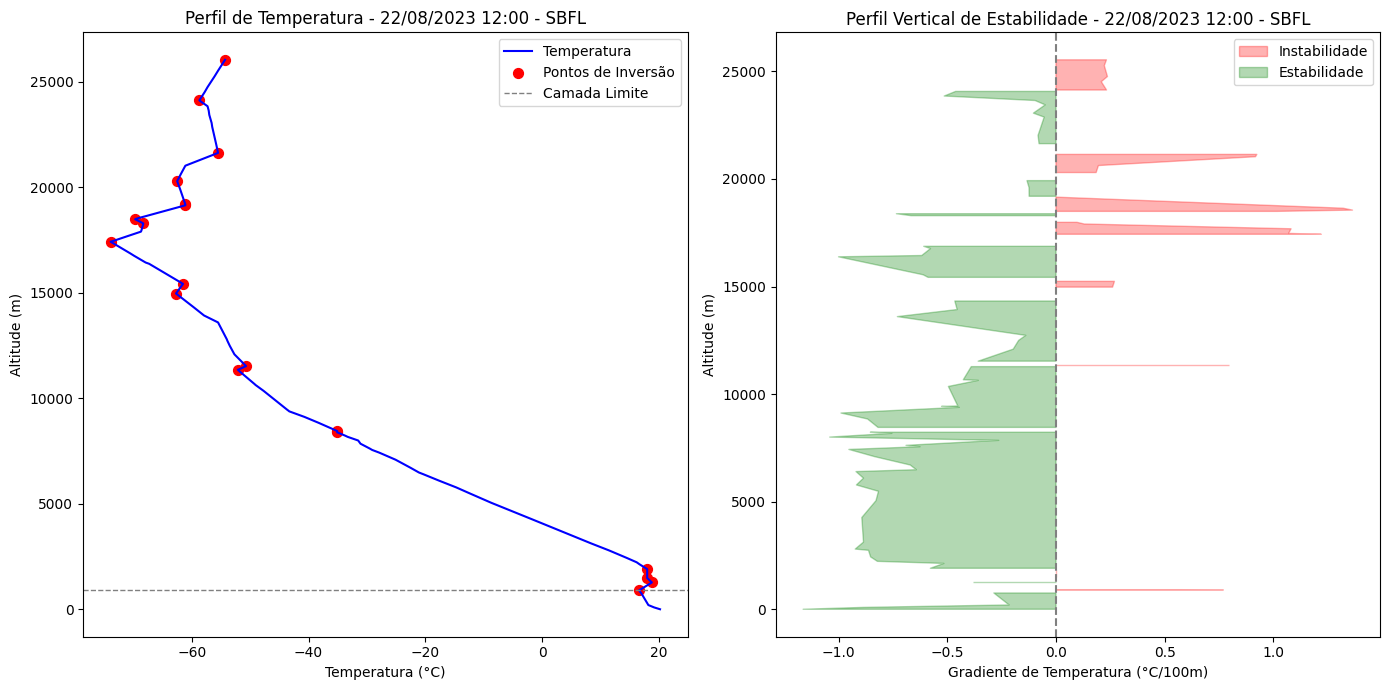

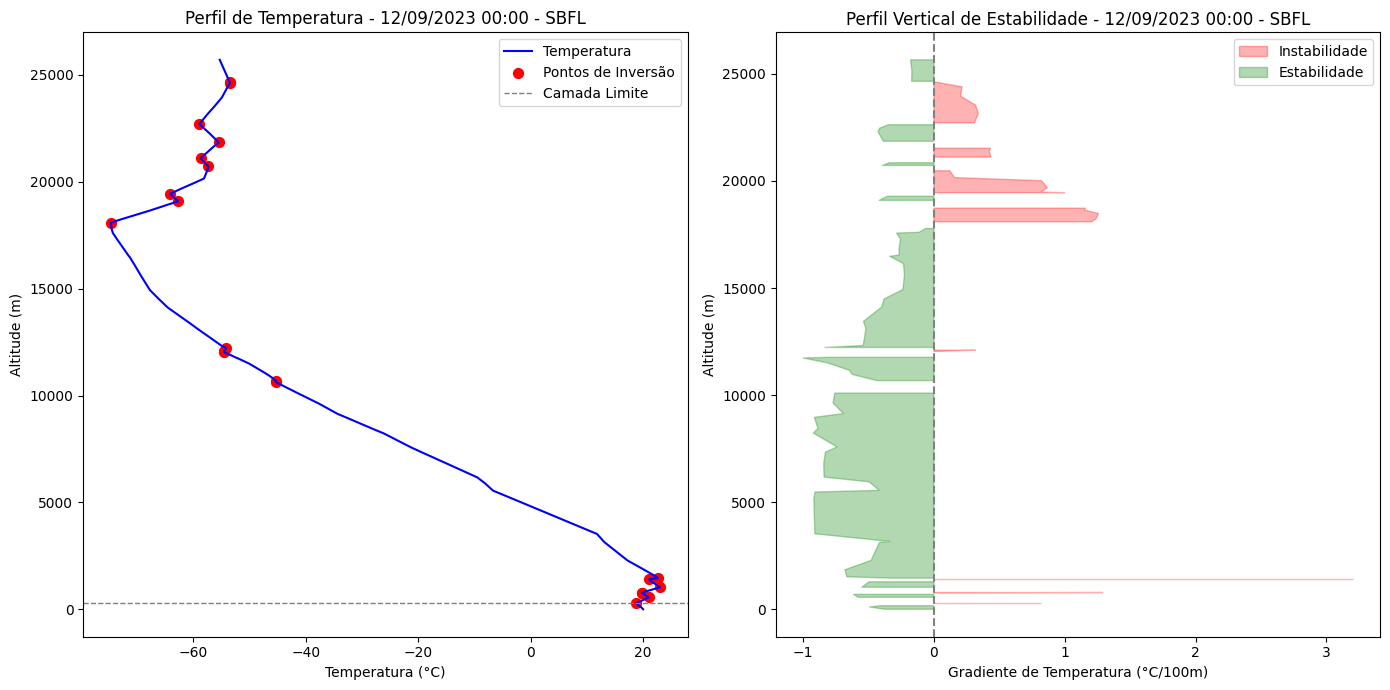

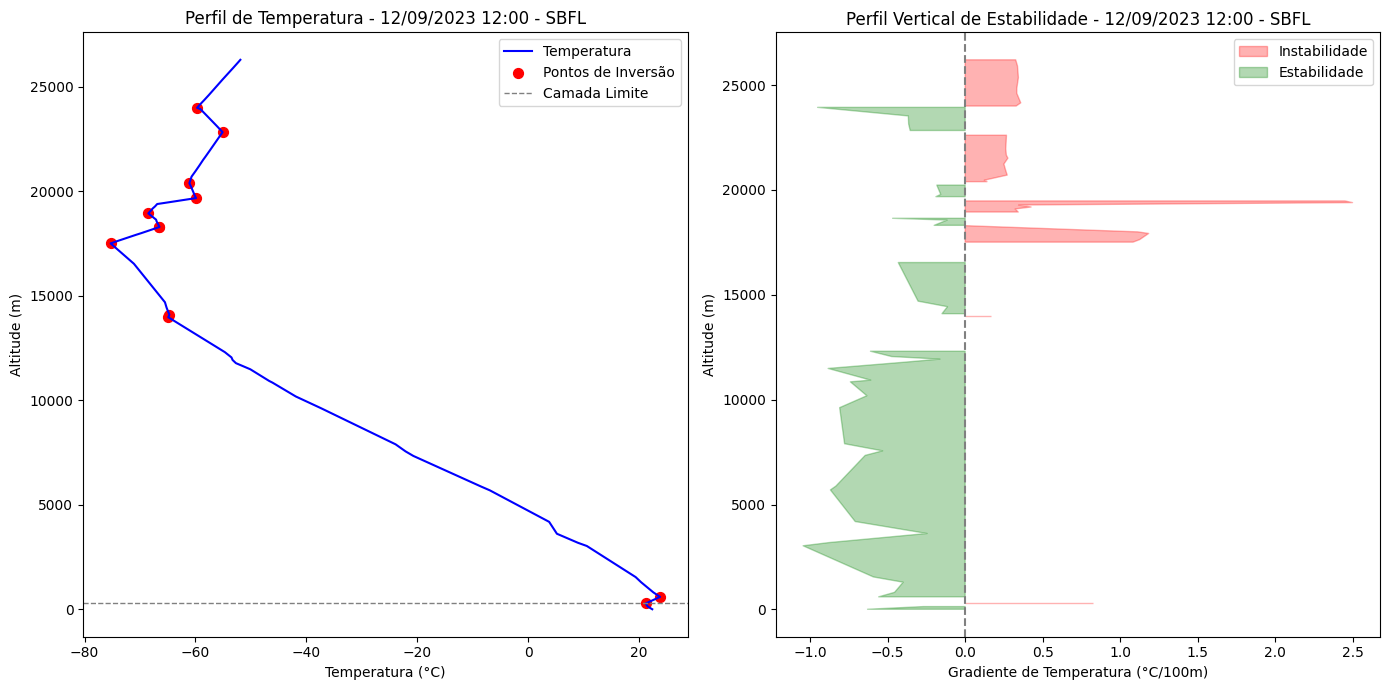

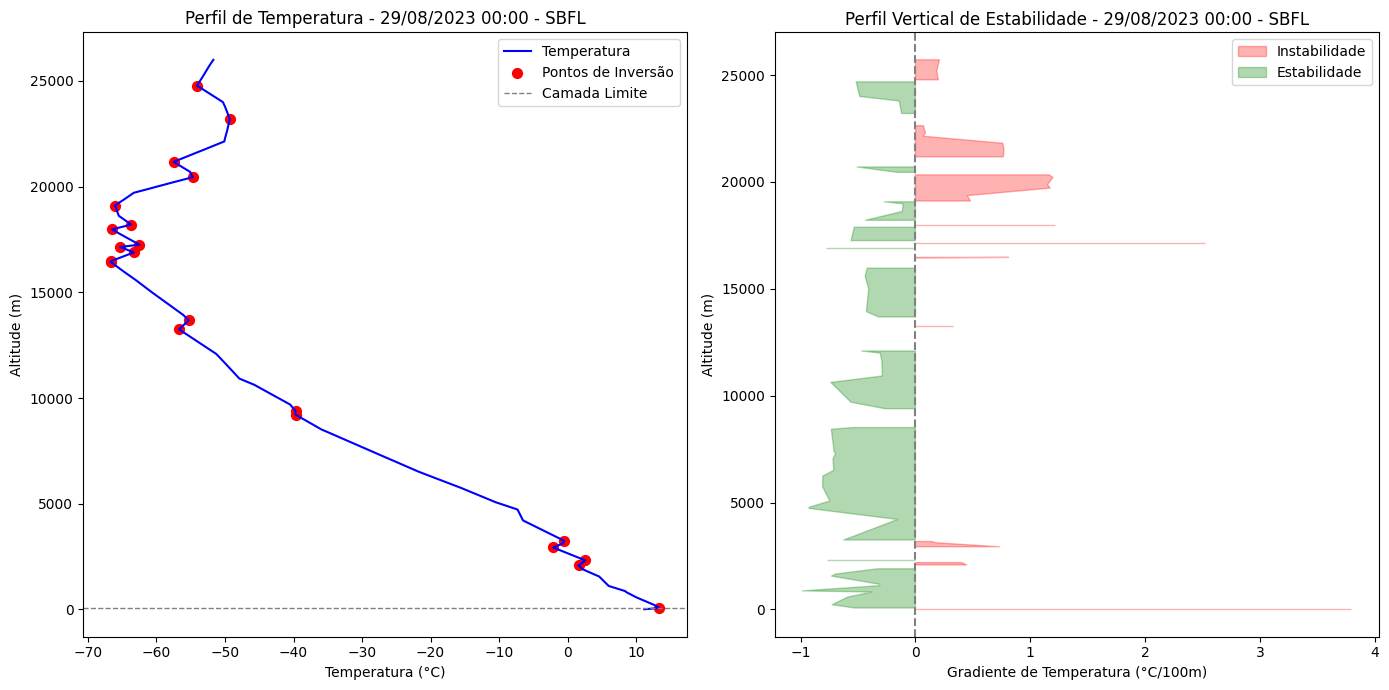

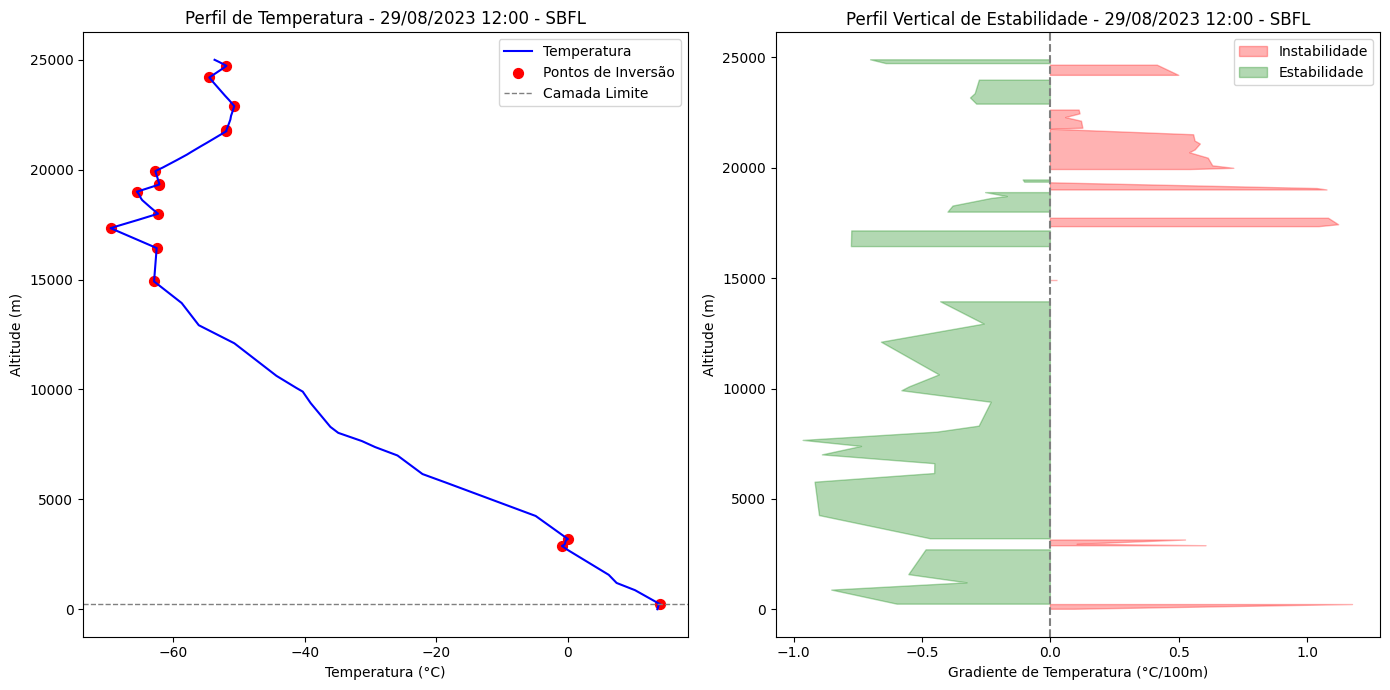

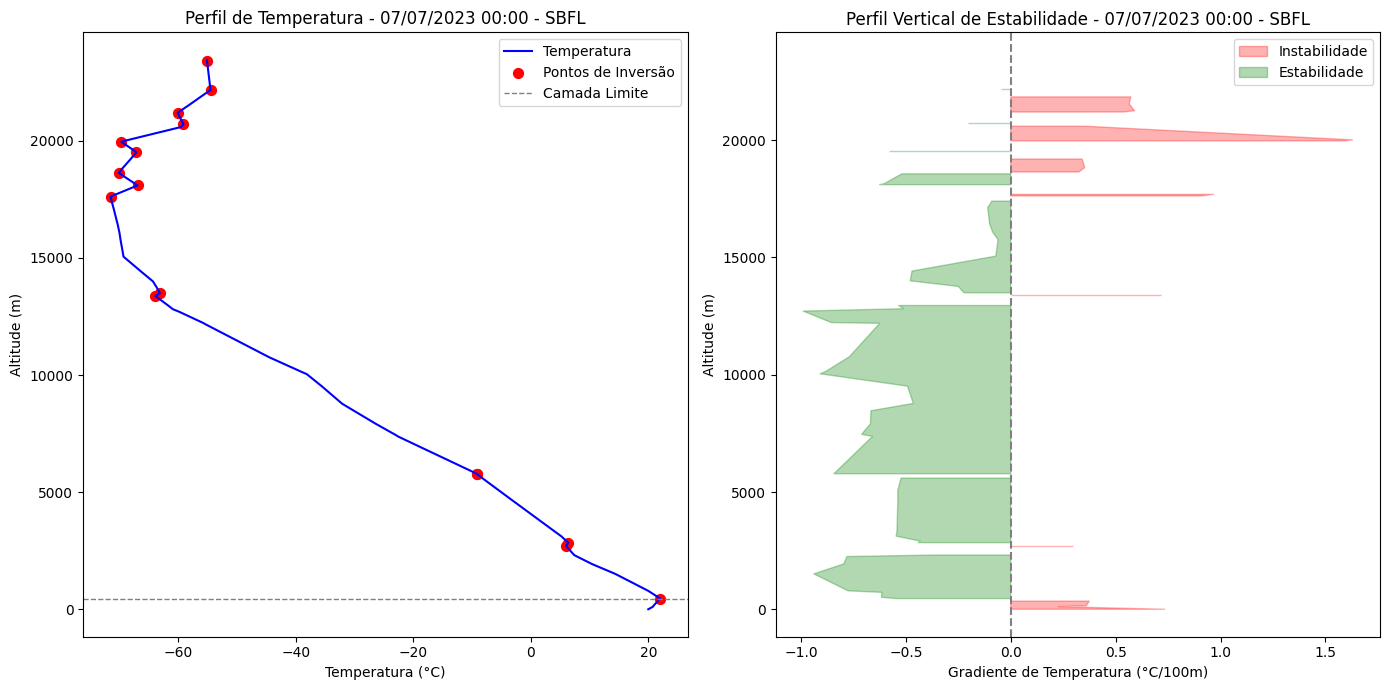

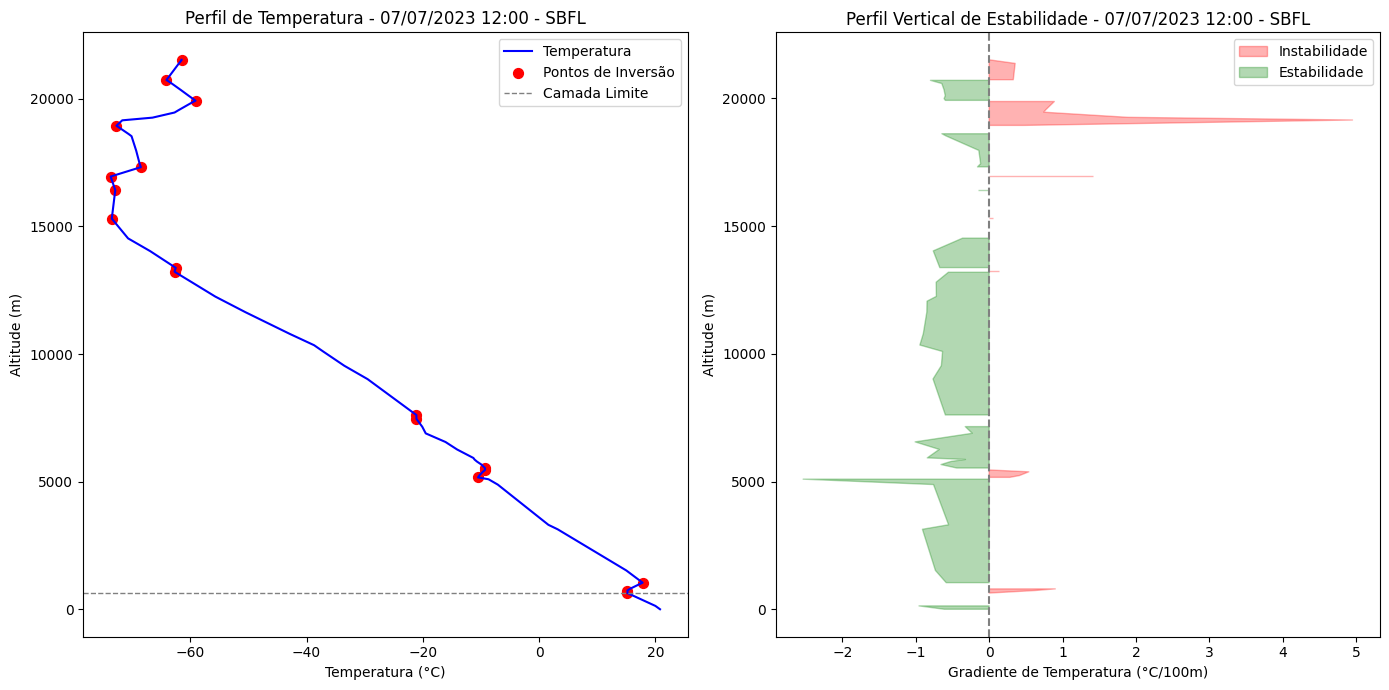

                 Data  Altura  Estação  Mês
0 2024-02-19 00:00:00    90.0    Verão    2
1 2024-02-19 12:00:00  1235.0    Verão    2
2 2023-12-21 00:00:00  2040.0    Verão   12
3 2023-12-21 12:00:00  1888.0    Verão   12
4 2024-03-05 12:00:00  1474.0    Verão    3
0 2023-08-19 00:00:00   348.0  Inverno    8
1 2023-08-19 12:00:00   744.0  Inverno    8
2 2023-08-22 00:00:00   284.0  Inverno    8
3 2023-08-22 12:00:00   901.0  Inverno    8
4 2023-09-12 00:00:00   293.0  Inverno    9
5 2023-09-12 12:00:00   281.0  Inverno    9
6 2023-08-29 00:00:00    63.0  Inverno    8
7 2023-08-29 12:00:00   235.0  Inverno    8
8 2023-07-07 00:00:00   459.0  Inverno    7
9 2023-07-07 12:00:00   638.0  Inverno    7


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para plotar o perfil de temperatura e a estabilidade
def plot_temperature_profile_and_stability(df, datetime, station):
    # Extraindo a hora para o título
    time_str = datetime.strftime("%H:%M")
    
    # Calculando a diferença de temperatura e altitude
    temp = df['temperature'].values
    alt = df['height'].values
    deltaT = np.diff(temp)
    deltaZ = np.diff(alt)
    dTdZ = (deltaT / deltaZ) * 100  # Gradiente de temperatura a cada 100 m
    
    # Identificando inversões de temperatura
    pontos_inversao = np.where(np.diff(np.sign(deltaT)) != 0)[0] + 1
    inversion = dTdZ > 0
    
    # Armazenando a altura da camada limite e a data
    camada_limite_altura = alt[pontos_inversao[0]]
    camada_limite_data = datetime
    
    # Figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Perfil de temperatura com pontos de inversão
    ax1.plot(temp, alt, label='Temperatura', color='blue')
    ax1.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão', s=50)
    ax1.axhline(y=camada_limite_altura, color='gray', linestyle='--', linewidth=1, label='Camada Limite')  # Linha da camada limite
    ax1.set_xlabel('Temperatura (°C)')
    ax1.set_ylabel('Altitude (m)')
    ax1.set_title(f'Perfil de Temperatura - {datetime.strftime("%d/%m/%Y %H:%M")} - {station}')
    ax1.legend()

    # Gráfico de estabilidade
    ax2.axvline(x=0, color='gray', linestyle='--')

    # Preenchendo as áreas de instabilidade e estabilidade
    ax2.fill_betweenx(alt[:-1], dTdZ, where=(dTdZ >= 0), color='red', alpha=0.3, label='Instabilidade')
    ax2.fill_betweenx(alt[:-1], dTdZ, where=(dTdZ < 0), color='green', alpha=0.3, label='Estabilidade')
    
    ax2.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax2.set_ylabel('Altitude (m)')
    ax2.set_title(f'Perfil Vertical de Estabilidade - {datetime.strftime("%d/%m/%Y %H:%M")} - {station}')
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    return camada_limite_data, camada_limite_altura

# Lista para armazenar as datas e alturas das camadas limite
camadas_limite_verao = []
camadas_limite_inverno = []

# Gerando gráficos para dados de verão
for datetime, df in summer_data.items():
    data_camada_limite, altura_camada_limite = plot_temperature_profile_and_stability(df, datetime, station)
    camadas_limite_verao.append({'Data': data_camada_limite, 'Altura': altura_camada_limite})

# Gerando gráficos para dados de inverno
for datetime, df in winter_data.items():
    data_camada_limite, altura_camada_limite = plot_temperature_profile_and_stability(df, datetime, station)
    camadas_limite_inverno.append({'Data': data_camada_limite, 'Altura': altura_camada_limite})

# Criando os DataFrames com as datas e alturas das camadas limite
df_camadas_limite_verao = pd.DataFrame(camadas_limite_verao)
df_camadas_limite_inverno = pd.DataFrame(camadas_limite_inverno)

# Adicionando a coluna de estação
df_camadas_limite_verao['Estação'] = 'Verão'
df_camadas_limite_inverno['Estação'] = 'Inverno'

# Concatenando os DataFrames
df_camadas_limite = pd.concat([df_camadas_limite_verao, df_camadas_limite_inverno])

# Agrupando os dados por mês e estação
df_camadas_limite['Mês'] = df_camadas_limite['Data'].dt.month

# Exibindo o DataFrame
print(df_camadas_limite)


In [78]:
import sys

# Instale a biblioteca tabulate se ainda não estiver instalada
!{sys.executable} -m pip install tabulate

from tabulate import tabulate

# Supondo que você já tenha o DataFrame df_camadas_limite preenchido corretamente

# Exibir DataFrame como tabela
print(tabulate(df_camadas_limite, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤══════════╤═══════════╤═══════╕
│    │ Data                │   Altura │ Estação   │   Mês │
╞════╪═════════════════════╪══════════╪═══════════╪═══════╡
│  0 │ 2024-02-19 00:00:00 │       90 │ Verão     │     2 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  1 │ 2024-02-19 12:00:00 │     1235 │ Verão     │     2 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  2 │ 2023-12-21 00:00:00 │     2040 │ Verão     │    12 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  3 │ 2023-12-21 12:00:00 │     1888 │ Verão     │    12 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  4 │ 2024-03-05 12:00:00 │     1474 │ Verão     │     3 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  0 │ 2023-08-19 00:00:00 │      348 │ Inverno   │     8 │
├────┼─────────────────────┼──────────┼───────────┼───────┤
│  1 │ 2023-08-19 12:00:00 │      744 │ Inverno   │     8 │
├────┼─────────────────────┼──────────┼─

C:\Users\mayar\AppData\Local\Temp\ipykernel_11512\4202134661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verao['Data'] = verao['Data'].dt.strftime('%y/%m/%d')
C:\Users\mayar\AppData\Local\Temp\ipykernel_11512\4202134661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverno['Data'] = inverno['Data'].dt.strftime('%y/%m/%d')


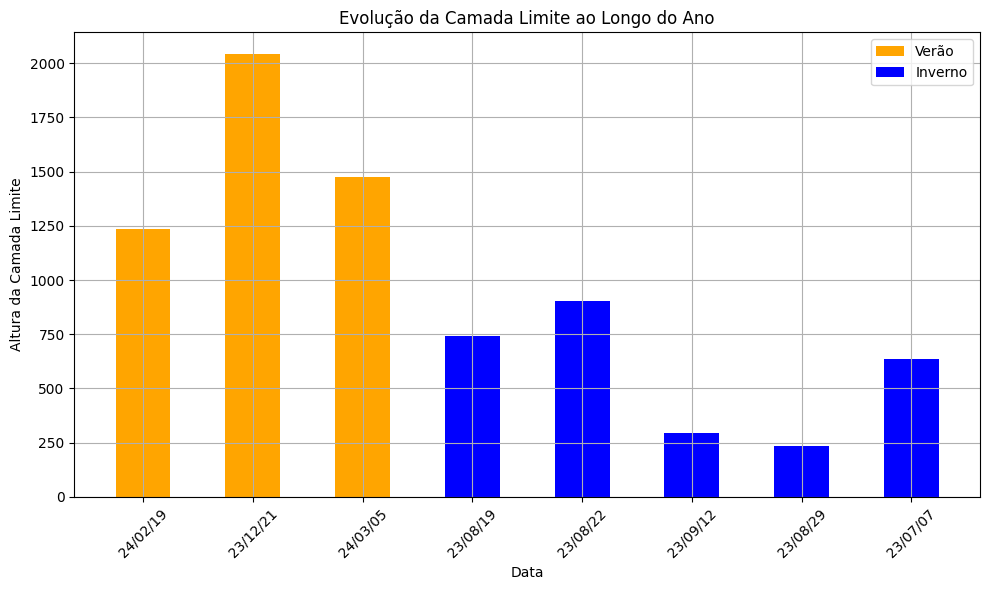

In [83]:
import matplotlib.pyplot as plt

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Convertendo as datas para o formato 'yy/mm/dd'
verao['Data'] = verao['Data'].dt.strftime('%y/%m/%d')
inverno['Data'] = inverno['Data'].dt.strftime('%y/%m/%d')

# Plotando os dados de verão
ax.bar(verao['Data'], verao['Altura'], label='Verão', color='orange', width=0.5)  # Ajustando a largura das barras

# Plotando os dados de inverno
ax.bar(inverno['Data'], inverno['Altura'], label='Inverno', color='blue', width=0.5)  # Ajustando a largura das barras

# Configurando o título e os rótulos dos eixos
ax.set_title('Evolução da Camada Limite ao Longo do Ano')
ax.set_xlabel('Data')
ax.set_ylabel('Altura da Camada Limite')

# Adicionando legenda
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


╒════════╤══════════╤═══════════╤═══════╕
│ Data   │ Altura   │ Estação   │ Mês   │
╞════════╪══════════╪═══════════╪═══════╡
╘════════╧══════════╧═══════════╧═══════╛


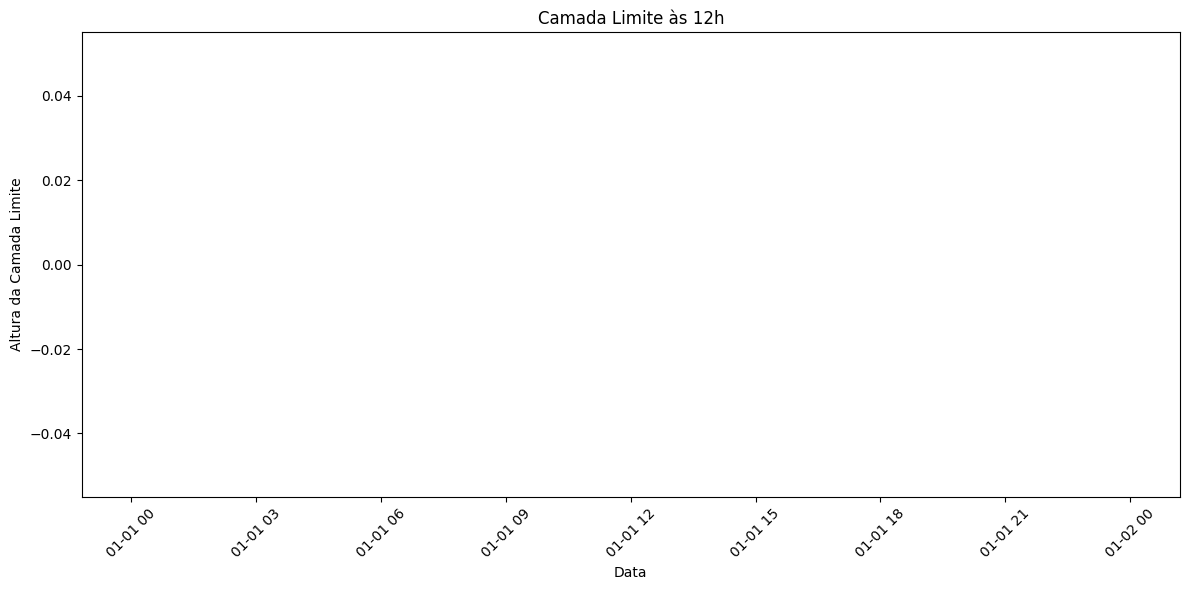

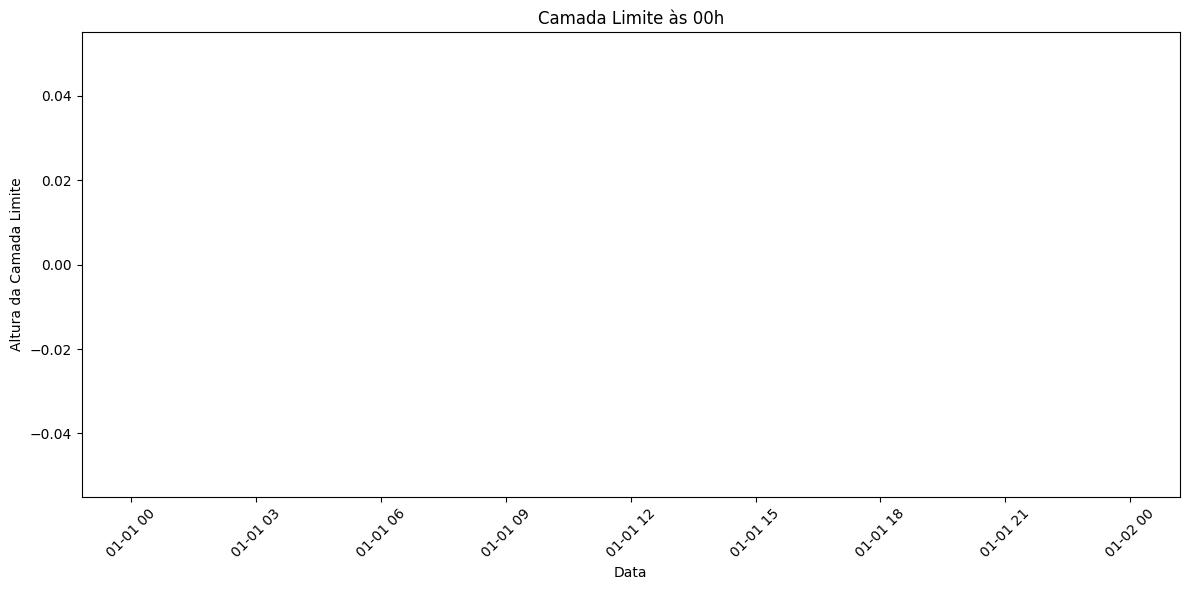

In [85]:

plt.show()


# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

In [ ]:
# Instalar o módulo netCDF4
!pip install netCDF4

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog
import numpy as np

# Combinar latitudes e longitudes 1D em uma grade 2D de locais
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Verificar se temp_vals é 1D e converter para 2D
if temp_vals.ndim == 1:
    temp_vals = temp_vals.reshape(len(lat_vals), len(lon_vals))

# Acessar o catálogo de dados GFS
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

# Selecionar o melhor conjunto de dados
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

# Configurar a consulta
query = ncss.query()

# Definir a área geográfica e o tempo para a consulta
query.lonlat_box(north=-28.732, south=-28.737, east=-49.368, west=-79.3725).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

# Obter os dados da consulta
data = ncss.get_data(query)
print(list(data.variables))

# Selecionar a variável de temperatura
temp_var = data.variables['Temperature_surface']  # Podem analisar outras variáveis.

# Pegar o nome da variável de tempo a partir dos atributos de coordenadas da temperatura
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Obter os valores reais dos dados e remover dimensões de tamanho 1
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Converter o número de horas desde o tempo de referência para uma data real
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Converter temperaturas de Kelvin para Celsius
temp_vals = temp_vals - 273.15

# Combinar latitudes e longitudes 1D em uma grade 2D de locais
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Criar uma nova figura
fig = plt.figure(figsize=(15, 12))

# Adicionar o mapa e definir a extensão
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Adicionar fronteiras de estados ao plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contornar a temperatura em cada lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plotar uma barra de cores para mostrar a temperatura e reduzir seu tamanho
plt.colorbar(cf, ax=ax, fraction=0.032)

# Criar um título com o valor do tempo
ax.set_title(u'Temperature forecast (°C) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plotar marcadores para cada lat/long para mostrar pontos de grade do GFS de 0,25 deg
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

plt.show()


16- Vocês precisam analisar o arquivo METEO.SFC. A página 83 (ou 2-54) do user guide do AERMET detalha cada coluna deste arquivo: https://www.epa.gov/sites/default/files/2020-09/documents/aermet_userguide.pdf. Abra este arquivo no libreoffice ou excel e converta para .csv. substitua o cabeçalho para facilitar sua vida. 
17 - Abra no python para analisar as variáveis desta atividade. 

1-5 ano (2 dígitos), mês, dia, dia juliano e hora
6 fluxo de calor sensível (W/m2)
7 velocidade de fricção da superfície (m/s)
8 escala de velocidade convectiva (definida como -9.0 para atmosfera estável) (m/s)
9 gradiente de temperatura potencial acima da altura de mistura (K/m)
10 altura de mistura impulsionada por convecção (definida como -999. para atmosfera estável) (m)
11 altura de mistura impulsionada mecanicamente (calculada para todas as horas) (m)
12 comprimento de Monin-Obukhov (m)
13 comprimento de rugosidade da superfície (dependente do mês e direção do vento) (m)
14 razão de Bowen (dependente do mês e direção do vento) (adimensional)
15 albedo (dependente do mês e direção do vento; 1.0 para horas antes do nascer do sol ou após o pôr do sol) (adimensional)
16-18 velocidade do vento, direção do vento e altura do anemômetro usados nos cálculos na Etapa 3 (m/s, graus, m)
19-20 temperatura e altura de medição usadas nos cálculos na Etapa 3 (K e m)
21 código de tipo de precipitação
22 quantidade de precipitação (mm/hr)
23 umidade relativa (%)
24 pressão atmosférica da estação (mb)
25 cobertura de nuvens (décimos)
26 ajuste de velocidade do vento e sinalizador da fonte de dados
27 cobertura de nuvens e substituição de temperatura por interpolação








 # EZ-AERMET

3 - Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satéli

In [ ]:
# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
meteoSFC = rootPath +'\\inputs\\meteoSFC'
print(meteoSFC)

# Listando os arquivos dentro do diretório
files = os.listdir(meteoSFC)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSFC=[]
for file in files:
    metSFC.append(pd.read_csv(meteoSFC+'\\'+file))

# Convertendo metSFC para DataFrame
metSFC = pd.concat(metSFC)

print(metSFC)
#print(type(metSFC))

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo de dados meteorológicos
path_meteo = 'C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSFC\meteo.sfc.csv'

# Leitura do arquivo CSV
df_meteo = pd.read_csv(path_meteo)

# Converte as colunas de ano, mês e dia para um objeto datetime
df_meteo['data'] = pd.to_datetime(df_meteo['year'].astype(str) +
                                  df_meteo['month'].astype(str) +
                                  df_meteo['day'].astype(str), format='%y%m%d')

# Exclui os valores específicos
df_meteo = df_meteo[(df_meteo['Boundary'] != -999) & (df_meteo['u'] != -9)]

# Exclui temporariamente as colunas não numéricas
df_meteo_numeric = df_meteo.select_dtypes(include=['float64', 'int64'])

#%% Série Anual com todos os dados
# Cria uma figura com 3 subplots na vertical
fig, axs = plt.subplots(3, 1, figsize=(8, 15), sharex=True)

# Plot 1: Obukhov
axs[0].plot(df_meteo['data'], df_meteo['obukhov'], linestyle='-', color='b')
axs[0].set_ylabel('Turbulência')

# Plot 2: U
axs[1].plot(df_meteo['data'], df_meteo['u'], linestyle='-', color='g')
axs[1].set_ylabel('Velocidade frictiva (m/s)')

# Plot 3: Boundary
axs[2].plot(df_meteo['data'], df_meteo['Boundary'], linestyle='-', color='r')
axs[2].set_ylabel('Altura da camada limite (m)')

#%% Série por Mês
# Agrupa por data e calcula a média para cada grupo
df_mean_month = df_meteo_numeric.groupby('month').mean()

# Exibe o DataFrame com a média por dia
print(df_mean_month)

# Cria uma figura com 3 subplots na vertical
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot 1: Obukhov por mês
axs[0].plot(df_mean_month.index, df_mean_month['obukhov'], linestyle='-', color='b')
axs[0].set_ylabel('Turbulência')

# Plot 2: U por mês
axs[1].plot(df_mean_month.index, df_mean_month['u'], linestyle='-', color='g')
axs[1].set_ylabel('Velocidade frictiva (m/s)')

# Plot 3: Boundary por mês
axs[2].plot(df_mean_month.index, df_mean_month['Boundary'], linestyle='-', color='r')
axs[2].set_ylabel('Altura da camada limite (m)')

# Configurações adicionais
plt.xlabel('Mês')
plt.tight_layout()
plt.legend()
plt.show()

#%% Agrupamento por dia
# Agrupa por data e calcula os valores máximos e mínimos para cada grupo
df_max_min_day = df_meteo.groupby('data').agg({'obukhov': ['max', 'min'], 'u': ['max', 'min'], 'Boundary': ['max', 'min']})

# Renomeia as colunas para algo mais amigável
df_max_min_day.columns = ['obukhov_max', 'obukhov_min', 'u_max', 'u_min', 'Boundary_max', 'Boundary_min']

# Cria uma figura com 3 subplots na vertical
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plot 1: Obukhov por dia
axs[0].plot(df_max_min_day.index, df_max_min_day['obukhov_max'], label='Max', color='blue', alpha=0.8)
axs[0].plot(df_max_min_day.index, df_max_min_day['obukhov_min'], label='Min', color='blue', alpha=0.5)
axs[0].set_ylabel('Turbulência')

# Plot 2: U por dia
axs[1].plot(df_max_min_day.index, df_max_min_day['u_max'], label='Max', color='green', alpha=0.8)
axs[1].plot(df_max_min_day.index, df_max_min_day['u_min'], label='Min', color='green', alpha=0.5)
axs[1].set_ylabel('Velocidade frictiva (m/s)')

# Plot 3: Boundary por dia
axs[2].plot(df_max_min_day.index, df_max_min_day['Boundary_max'], label='Max', color='red', alpha=0.8)
axs[2].plot(df_max_min_day.index, df_max_min_day['Boundary_min'], label='Min', color='red', alpha=0.5)
axs[2].set_ylabel('Altura da camada limite (m)')

plt.tight_layout()
plt.legend()
plt.show()
